<a href="https://colab.research.google.com/github/Shahroze-Gondal/Final_Project_kidney_disease_Classification/blob/main/kidney_Classification_Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The Dataset

> Add blockquote



In [39]:
!pip install ucimlrepo

In [40]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

# Importing the Required Libraries

In [41]:
import pandas as pd  # For data manipulation and analysis, including creating and handling DataFrames
import numpy as np  # For numerical computations and working with arrays/matrices
import matplotlib.pyplot as plt  # For creating static visualizations and plots
import seaborn as sns  # For advanced and aesthetically pleasing visualizations built on top of Matplotlib
import math  # For mathematical functions like logarithms, factorials, trigonometric functions, etc.
from sklearn.preprocessing import LabelEncoder  # For encoding categorical data into numerical labels
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for classification tasks
from sklearn.feature_selection import SelectFromModel  # Feature selection based on model importance
from sklearn.model_selection import train_test_split  # Splits dataset into training and testing sets
from sklearn.preprocessing import MinMaxScaler  # Scales features to a range (e.g., 0 to 1)
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning using cross-validation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Metrics for model evaluation
from sklearn.neighbors import KNeighborsClassifier  # Import the K-Nearest Neighbors classifier
from sklearn.neural_network import MLPClassifier    # Import the Multi-Layer Perceptron (Artificial Neural Network) classifier

# Dataset Exploaration

>




In [42]:
# Concatenate features (X) and target (y) into one dataframe
ckd_data = pd.concat([X, y], axis=1)
# Creating a dictionary to map short names to full names
column_names = {
    'age': 'Age',
    'bp': 'Blood Pressure',
    'sg': 'Specific Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red Blood Cells',
    'pc': 'Pus Cell',
    'pcc': 'Pus Cell Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood Glucose Random',
    'bu': 'Blood Urea',
    'sc': 'Serum Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wbcc': 'White Blood Cell Count',
    'rbcc': 'Red Blood Cell Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia',
    'class': 'Chronic Kidney Disease'
}

# Renaming columns in the dataframe
ckd_data.rename(columns=column_names, inplace=True)


# Display the combined dataframe
ckd_data.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [43]:
ckd_data.describe()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [44]:
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

# Missing Values Analysis

In [45]:
ckd_data.isnull().sum()

,0
Age,9
Blood Pressure,12
Specific Gravity,47
Albumin,46
Sugar,49
Red Blood Cells,152
Pus Cell,65
Pus Cell Clumps,4
Bacteria,4
Blood Glucose Random,44


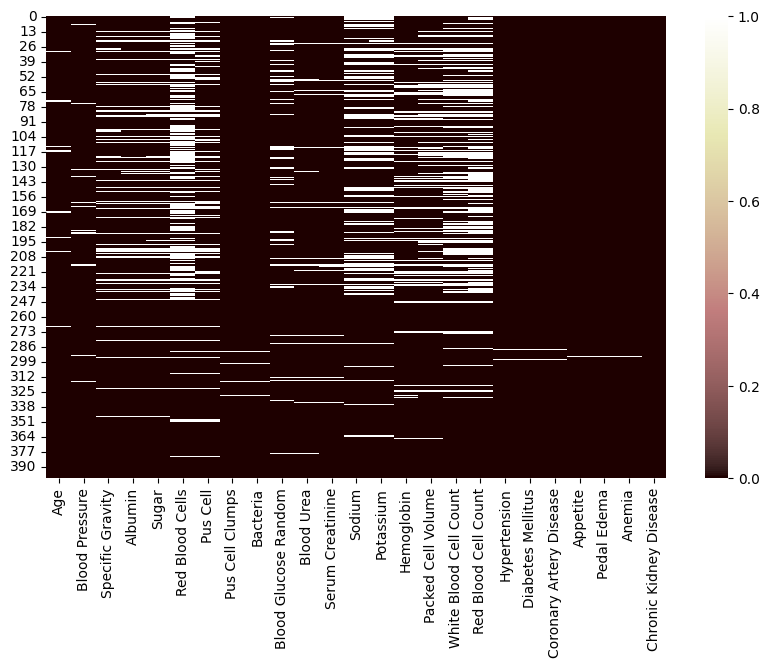

In [46]:
# Plotting a heatmap to show missing values with a custom color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(ckd_data.isnull(), cmap="pink", cbar=True)
plt.show()

In [47]:
# Fill missing numerical values with the mean
numerical_cols = ckd_data.select_dtypes(include=['float64', 'int64']).columns
ckd_data[numerical_cols] = ckd_data[numerical_cols].apply(lambda col: col.fillna(col.mean()), axis=0)

# Fill missing categorical values with the mode
categorical_cols = ckd_data.select_dtypes(include=['object', 'category']).columns
ckd_data[categorical_cols] = ckd_data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]), axis=0)

# Display the updated DataFrame
print("Data after filling missing values:")
print(ckd_data)


Data after filling missing values:
      Age  Blood Pressure  Specific Gravity  Albumin  Sugar Red Blood Cells  \
0    48.0            80.0             1.020      1.0    0.0          normal   
1     7.0            50.0             1.020      4.0    0.0          normal   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
..    ...             ...               ...      ...    ...             ...   
395  55.0            80.0             1.020      0.0    0.0          normal   
396  42.0            70.0             1.025      0.0    0.0          normal   
397  12.0            80.0             1.020      0.0    0.0          normal   
398  17.0            60.0             1.025      0.0    0.0          normal   
399  58.0            80.0             1.025      0.0    0.0          normal   

     Pus Cell Pu

# Data Cleaning

In [48]:
# Identify categorical columns
categorical_cols = ckd_data.select_dtypes(include=['object', 'category']).columns

# Display unique values in each categorical column
for col in categorical_cols:
    unique_values = ckd_data[col].unique()
    print(f"Column '{col}' has the following unique values: {unique_values}")


Column 'Red Blood Cells' has the following unique values: ['normal' 'abnormal']
Column 'Pus Cell' has the following unique values: ['normal' 'abnormal']
Column 'Pus Cell Clumps' has the following unique values: ['notpresent' 'present']
Column 'Bacteria' has the following unique values: ['notpresent' 'present']
Column 'Hypertension' has the following unique values: ['yes' 'no']
Column 'Diabetes Mellitus' has the following unique values: ['yes' 'no' '\tno']
Column 'Coronary Artery Disease' has the following unique values: ['no' 'yes']
Column 'Appetite' has the following unique values: ['good' 'poor']
Column 'Pedal Edema' has the following unique values: ['no' 'yes']
Column 'Anemia' has the following unique values: ['no' 'yes']
Column 'Chronic Kidney Disease' has the following unique values: ['ckd' 'ckd\t' 'notckd']


In [49]:
# Fix specific inconsistencies
ckd_data['Diabetes Mellitus'] = ckd_data['Diabetes Mellitus'].replace({'\tno': 'no'})
ckd_data['Chronic Kidney Disease'] = ckd_data['Chronic Kidney Disease'].replace({'ckd\t': 'ckd'})

# Verify the changes
for col in ckd_data.select_dtypes(include=['object', 'category']).columns:
    unique_values = ckd_data[col].unique()
    print(f"Cleaned unique values in column '{col}': {unique_values}")

Cleaned unique values in column 'Red Blood Cells': ['normal' 'abnormal']
Cleaned unique values in column 'Pus Cell': ['normal' 'abnormal']
Cleaned unique values in column 'Pus Cell Clumps': ['notpresent' 'present']
Cleaned unique values in column 'Bacteria': ['notpresent' 'present']
Cleaned unique values in column 'Hypertension': ['yes' 'no']
Cleaned unique values in column 'Diabetes Mellitus': ['yes' 'no']
Cleaned unique values in column 'Coronary Artery Disease': ['no' 'yes']
Cleaned unique values in column 'Appetite': ['good' 'poor']
Cleaned unique values in column 'Pedal Edema': ['no' 'yes']
Cleaned unique values in column 'Anemia': ['no' 'yes']
Cleaned unique values in column 'Chronic Kidney Disease': ['ckd' 'notckd']


# Categorical Values  Check in Each Columns

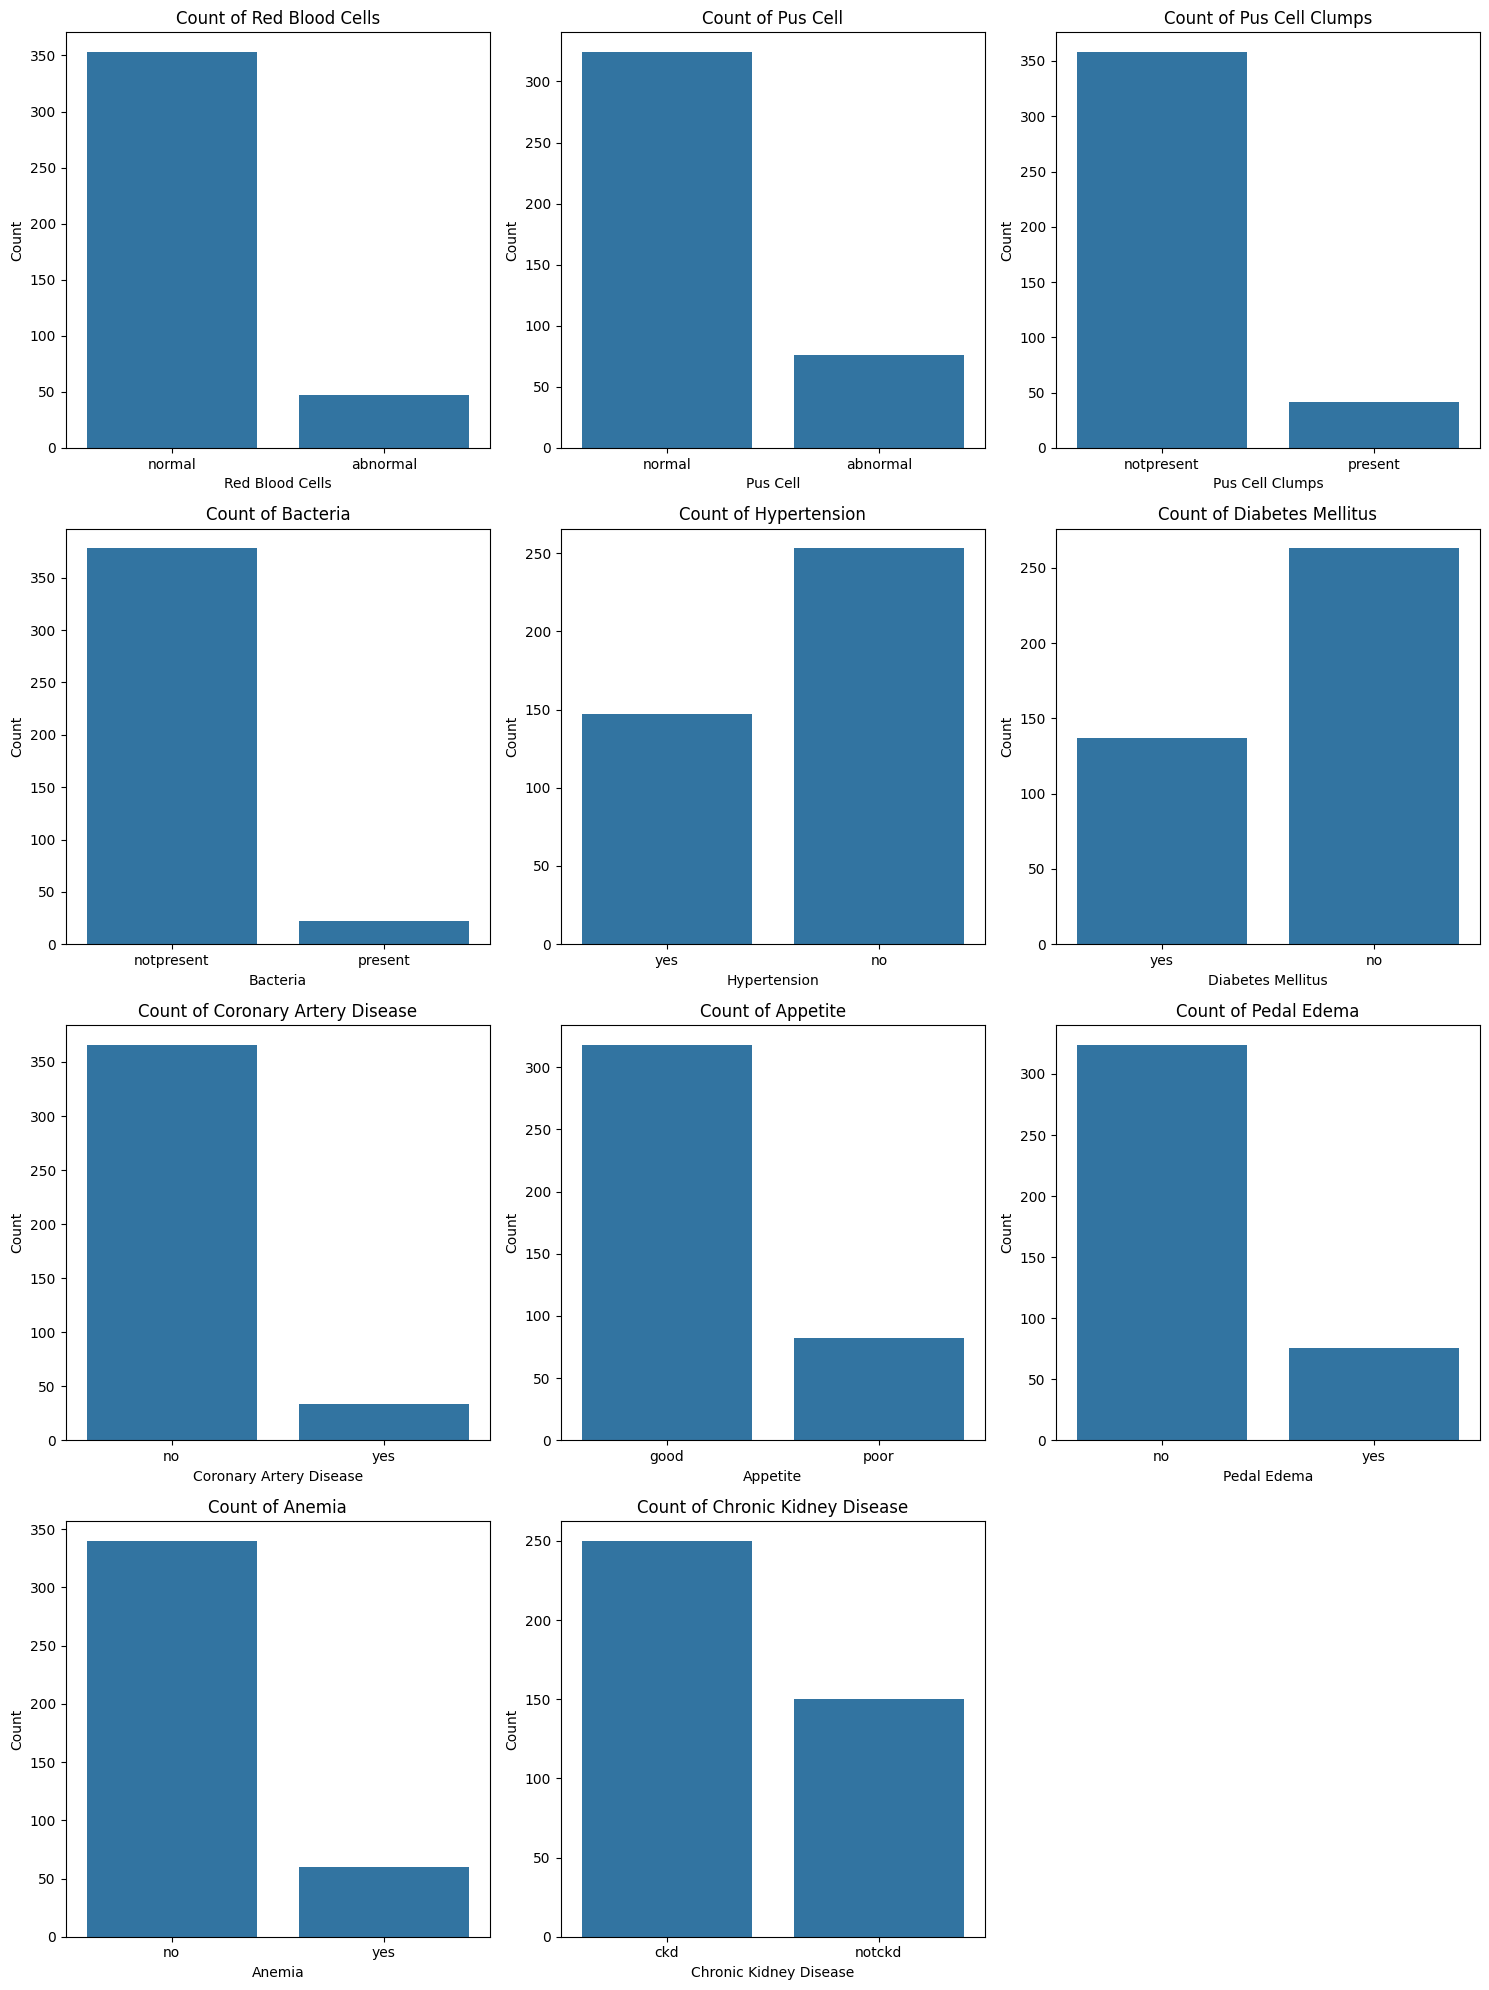

In [50]:
# Extracting categorical columns
categorical_columns = ckd_data.select_dtypes(include=['object']).columns

# Plotting count distribution for each categorical column
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)  # Adjust grid based on the number of categories
    sns.countplot(data=ckd_data, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

This bar plot depicts number of categories for categorical variables in CKD dataset. Typical categories ("normal" for red blood cells, "not present" for bacteria) are the dominant. Some variables, such as "Chronic Kidney Disease," are clearly different between classes (e.g., more cases of "ckd" than notckd), thus showing class imbalance.

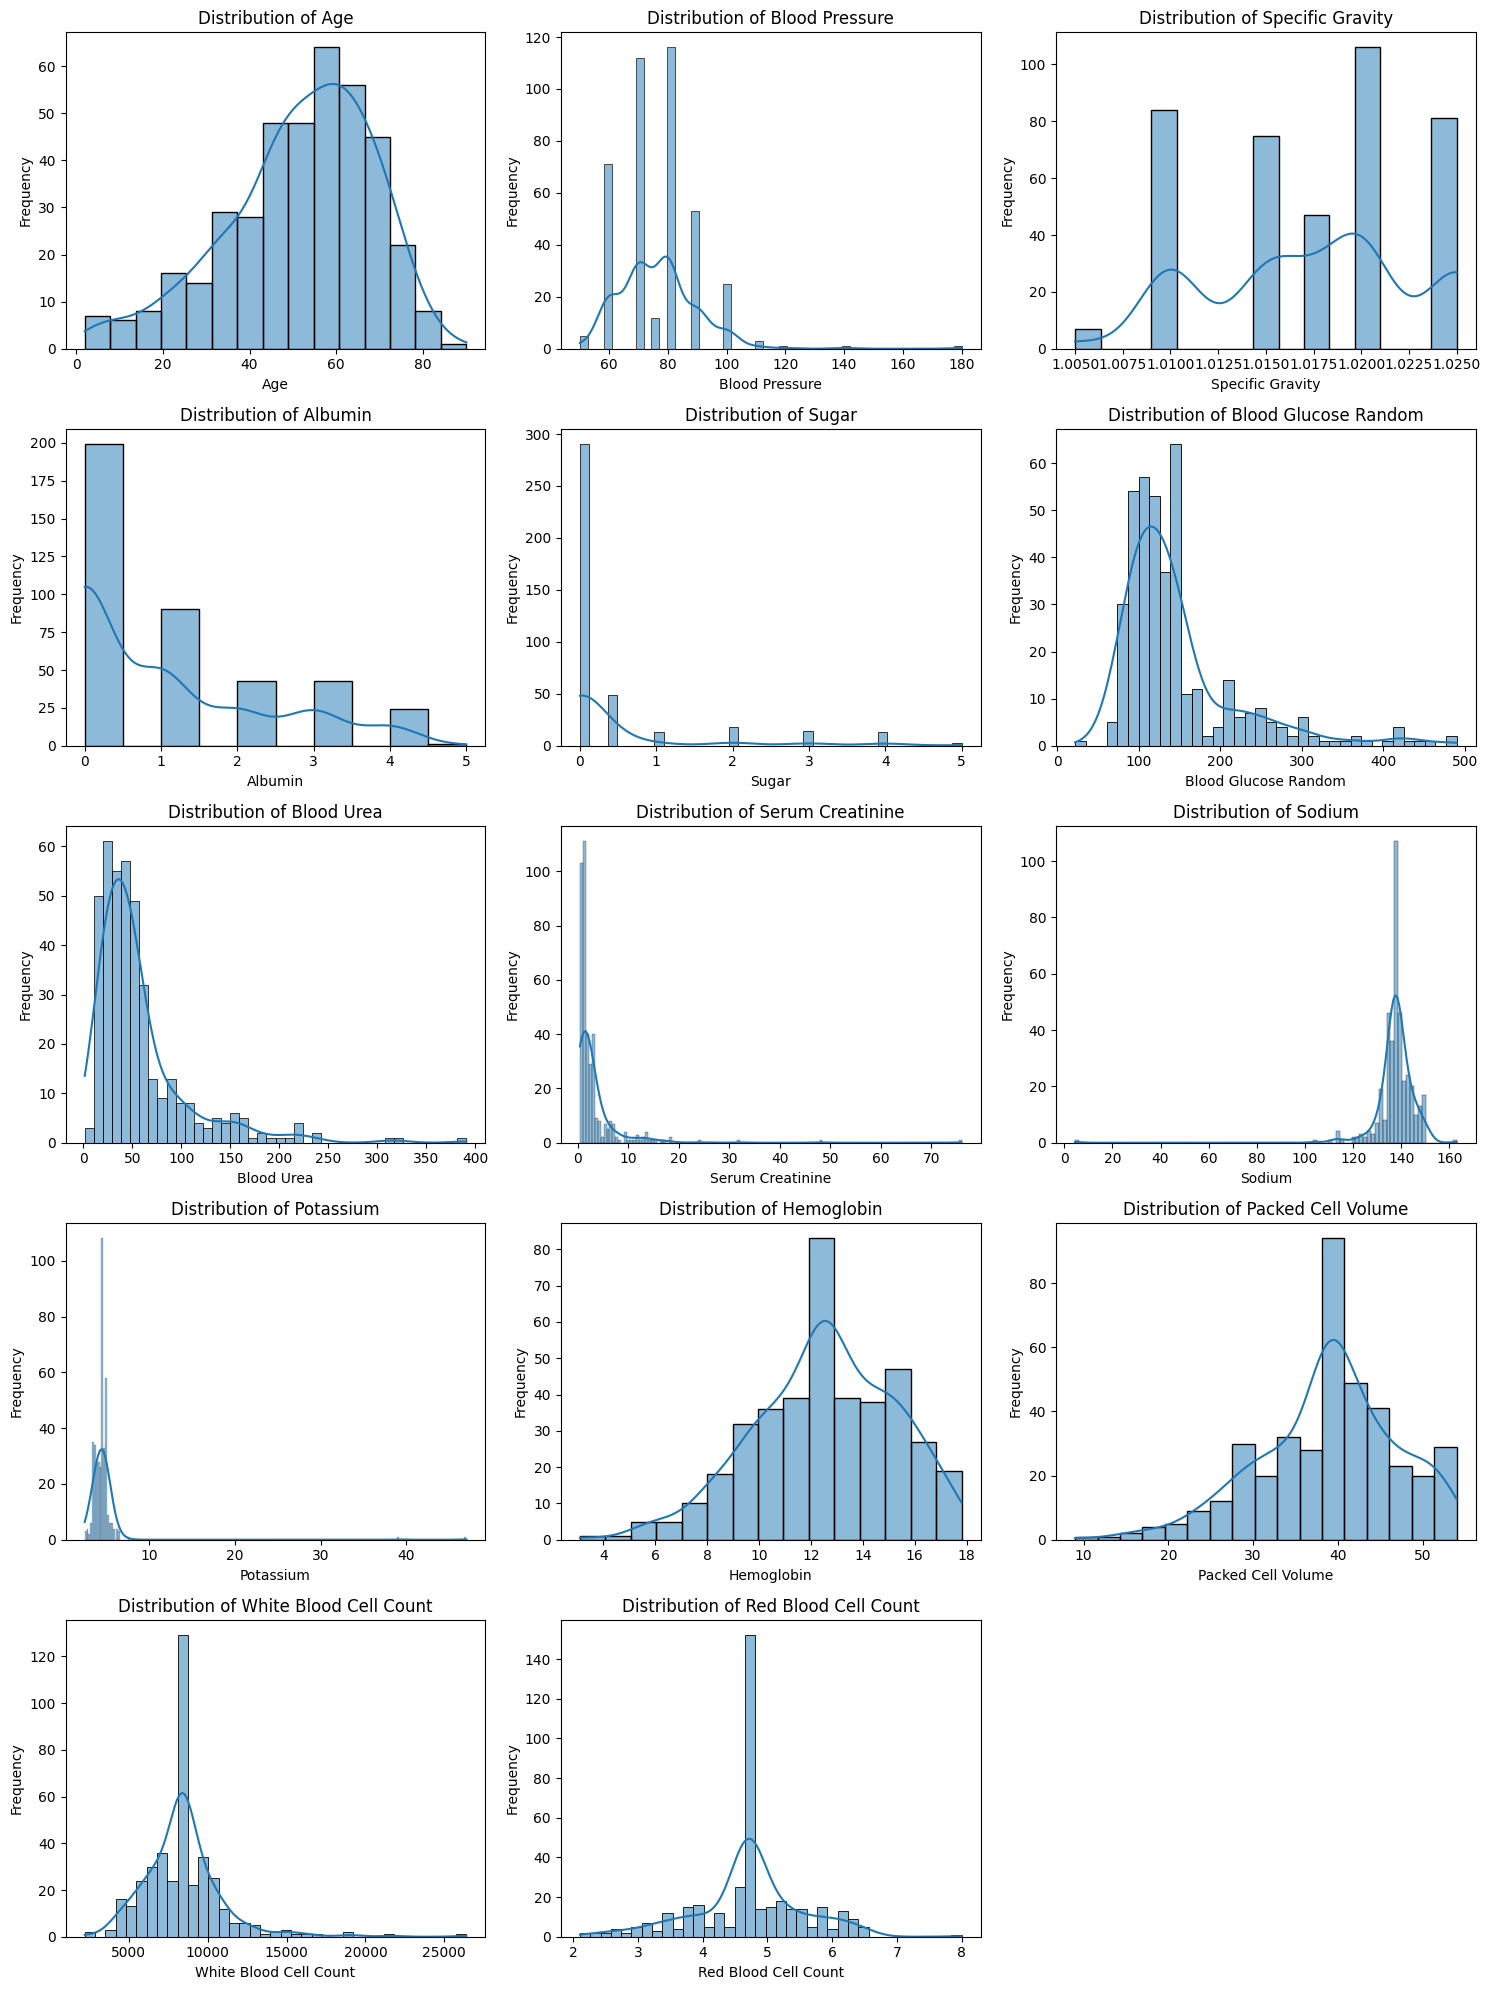

In [51]:
# Plotting the distribution of each numerical feature
numerical_features = ckd_data.select_dtypes(include='number').columns

# Setting up the plot grid
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(ckd_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

These histograms are the distribution of numeric variables in the CKD dataset. Most variables exhibit skewed distributions.  Serum Creatinine, Blood Urea and Potassium, for example, are very right-skewered as outliers or unbalanced values. Age and Hemoglobin distribution is normal. Data like Blood Glucose Random and Packed Cell Volume are peaking at certain levels, which indicates clustering or measurement limits. Labels like Albumin or Sugar are very specific because they are so small in their range of values. Remove the skewness and outliers to help increase the predictive power of machine learning algorithms in this dataset.

# Box Plot With Respect to Target Class

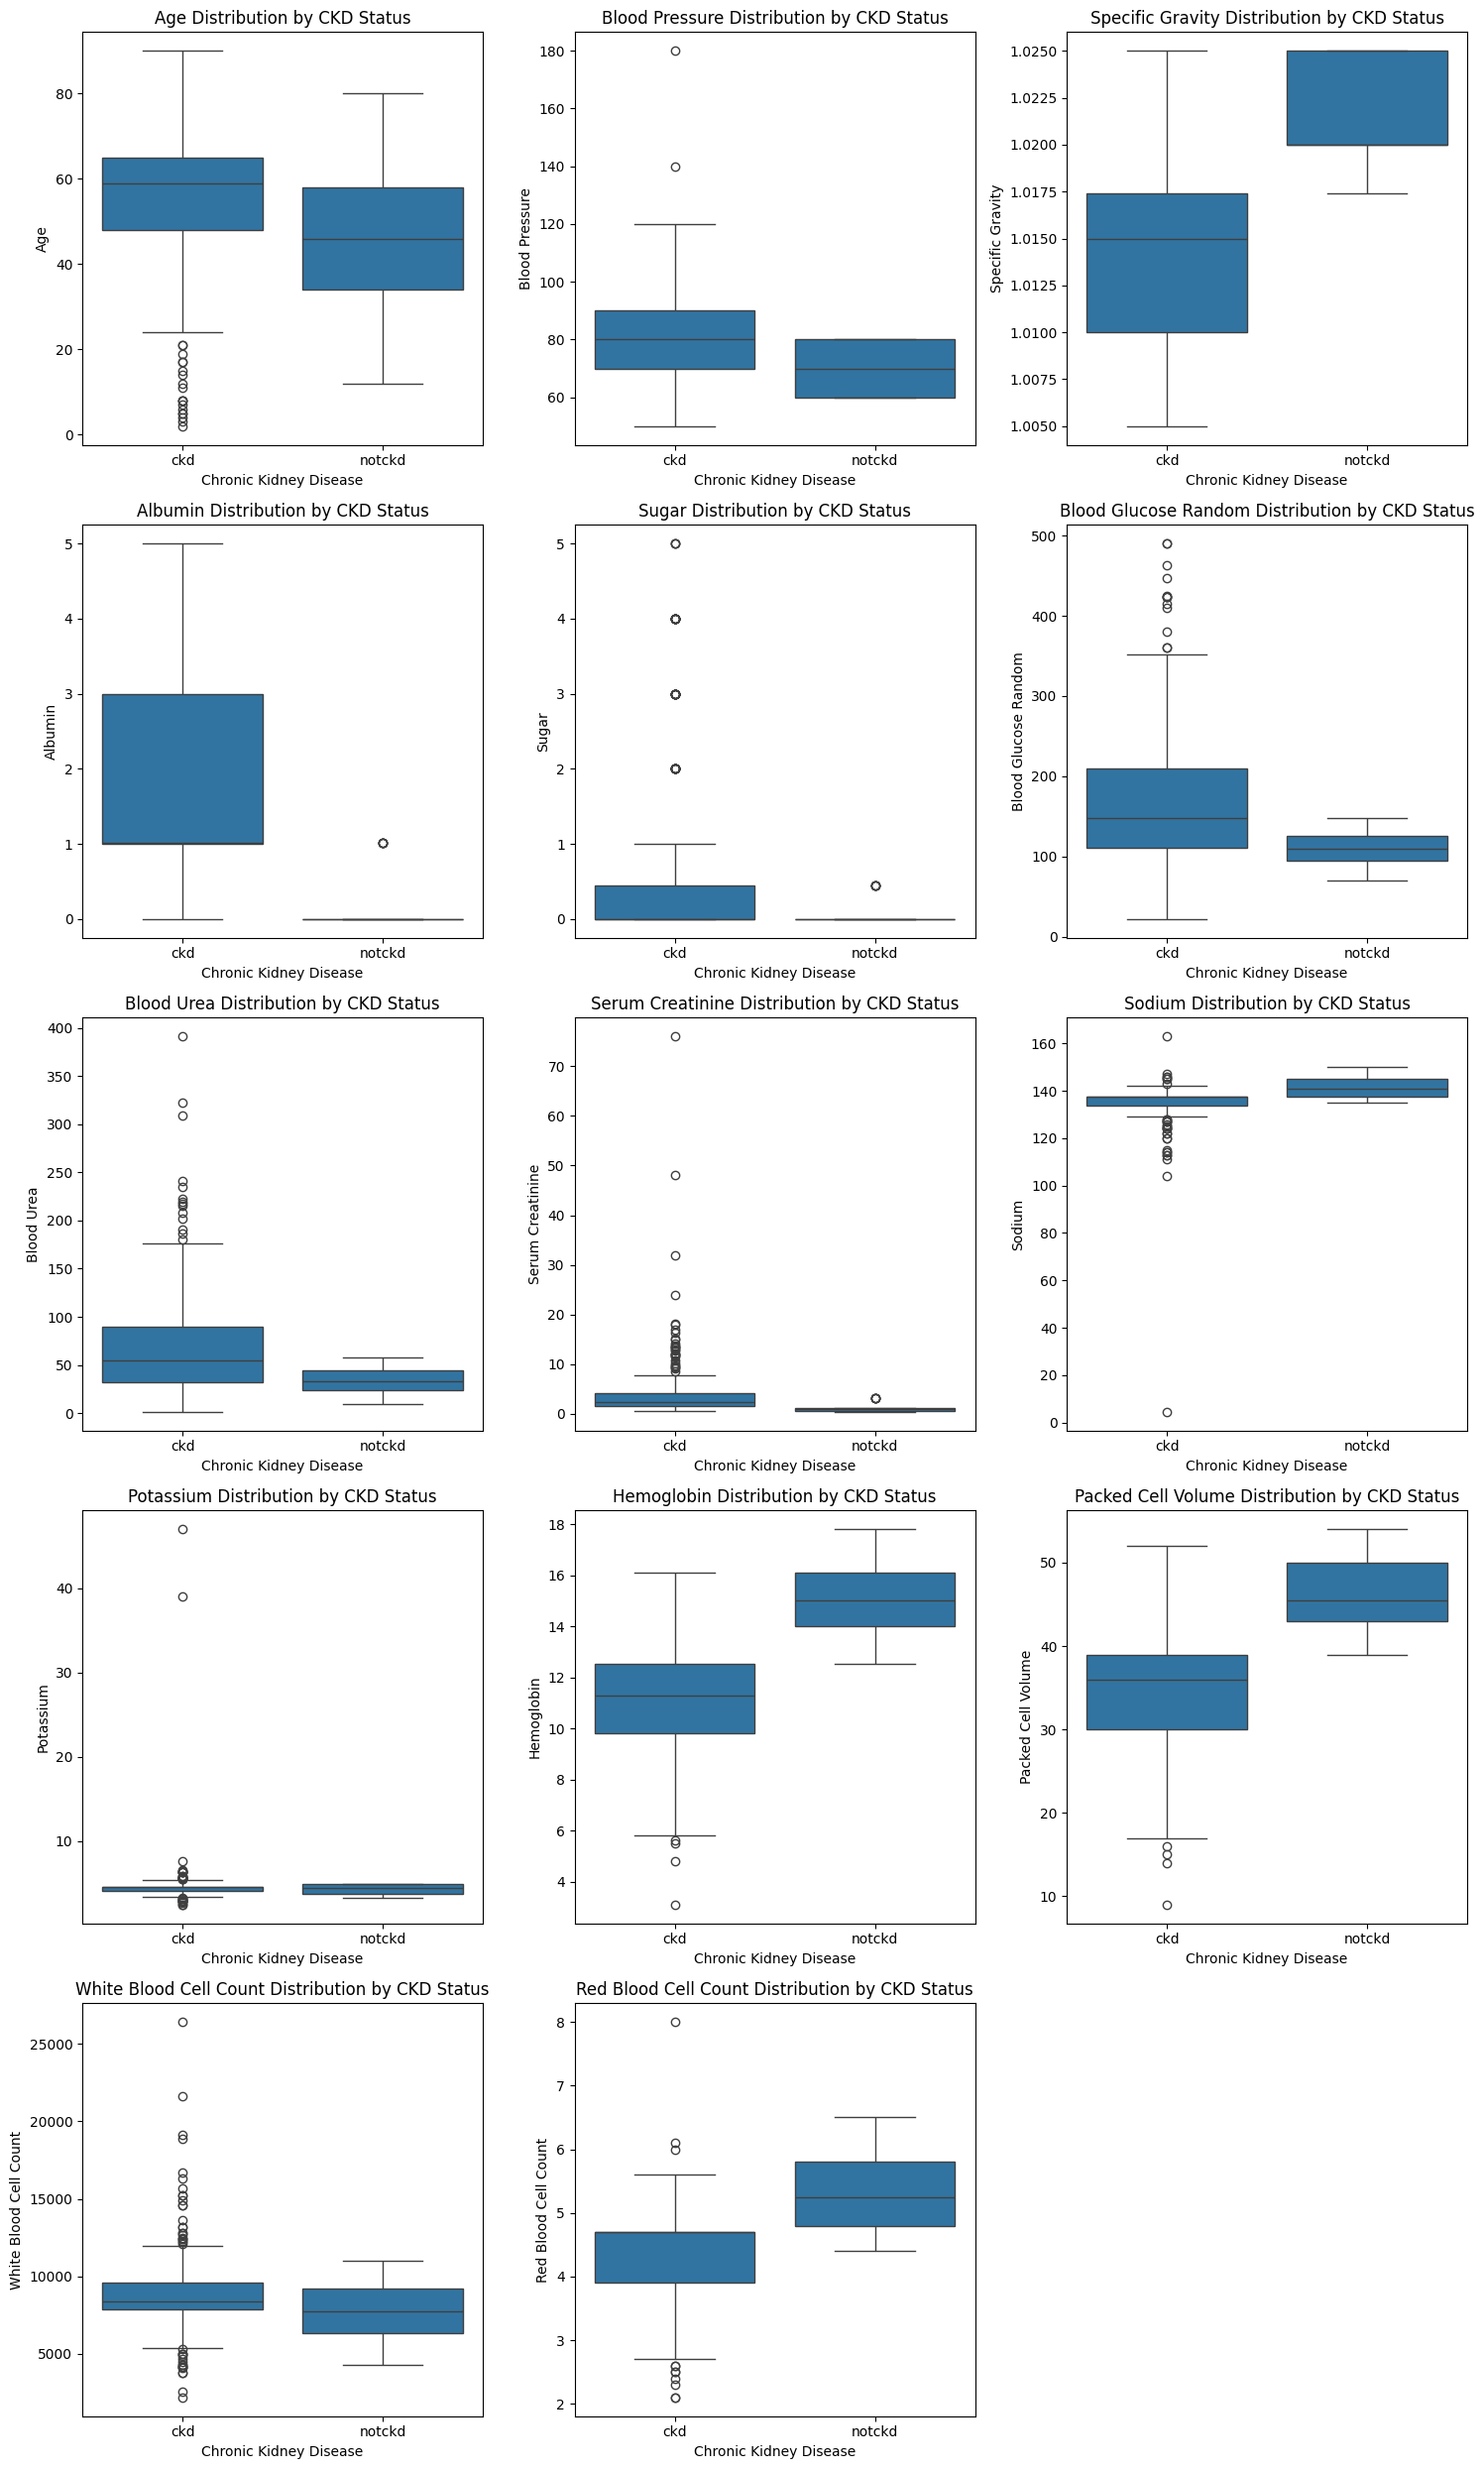

In [52]:
num_features = len(numerical_features)

# Define the number of columns for the subplot grid
ncols = 3  # Adjust this number based on how many plots per row
nrows = math.ceil(num_features / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each numerical feature and create a boxplot in the corresponding subplot
for idx, col in enumerate(numerical_features):
    sns.boxplot(data=ckd_data, x='Chronic Kidney Disease', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution by CKD Status')

# Remove any empty subplots if the number of features doesn't fill the grid
for idx in range(num_features, len(axes)):
    fig.delaxes(axes[idx])

# Adjusting layout and display the plots
plt.tight_layout()
plt.show()

The boxplots below show the CKD data distribution of numerical features according to CKD status. A lot of variables differ between CKD and non-CKD patients. In the case of CKD patients, **Serum Creatinine** and **Blood Urea**, for example, are much higher because of low kidney filtration. **Hemoglobin**, **Packed Cell Volume**, and **Red Blood Cell** Count on the other hand are also much lower in CKD patients which means they have **anemia** which is another CKD complication. Also clear, are the differences between Specific Gravity and Albumin, lower values associated with kidney disease. Age and Blood Pressure are similarly varying but, as you can see, CKD patients have a bit more variability in both. We find outliers in Features like **Potassium**, **Sodium**, and **Blood Glucose Random** that can be measurements error or unique cases to be checked. Such trends demonstrate how these biomarkers can help diagnose CKD and separate it from healthy people, and their use in predictive modelling.

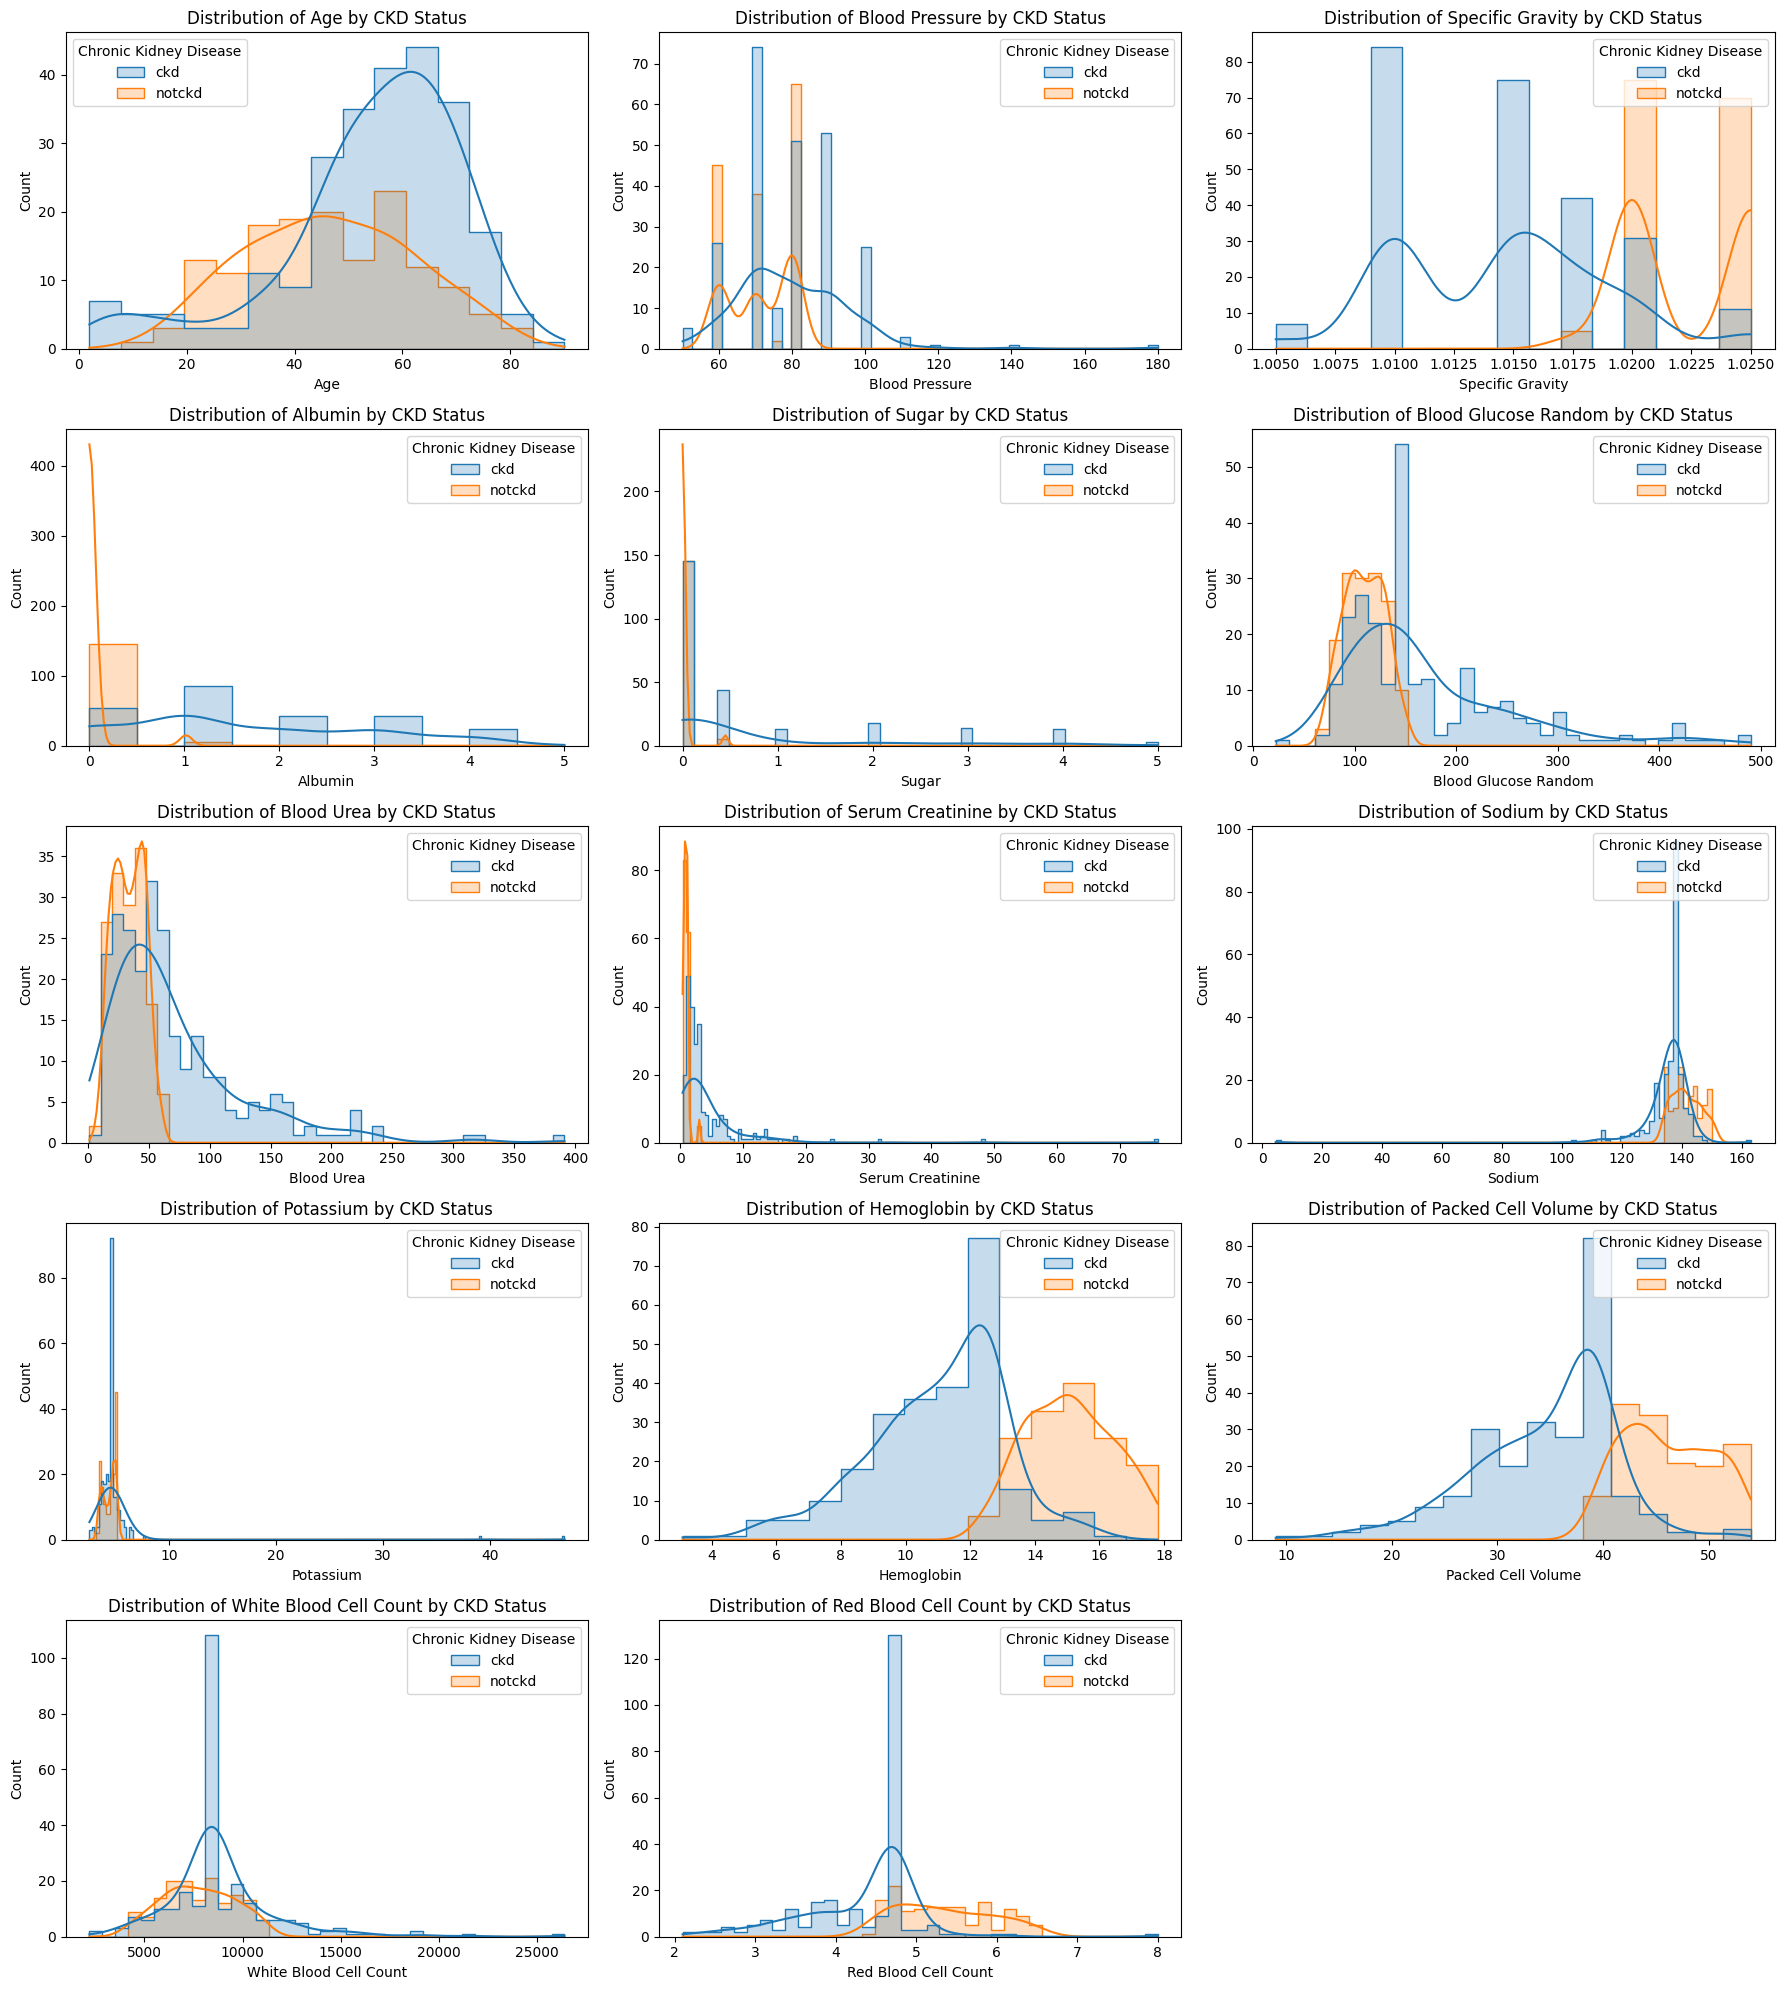

In [53]:
num_features = len(numerical_features)

# Define the number of columns for the subplot grid
ncols = 3  # Adjust this number based on how many plots per row you want
nrows = math.ceil(num_features / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each numerical feature and create a histogram in the corresponding subplot
for idx, col in enumerate(numerical_features):
    sns.histplot(data=ckd_data, x=col, hue='Chronic Kidney Disease', kde=True, element="step", ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by CKD Status')

# Remove any empty subplots if the number of features doesn't fill the grid
if num_features < len(axes):
    for idx in range(num_features, len(axes)):
        fig.delaxes(axes[idx])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The distribution of several numerical features by CKD status is depicted by this set of histograms (0: No CKD, 1: CKD). Important patterns between the two groups become apparent. **Serum creatinine**, **blood urea**, and **potassium **levels are higher in CKD patients (orange), indicating renal disease. On the other hand, CKD patients have lower levels of** hemoglobin**, **packed cell volume**, and **red blood cell** count, which suggests **anemia** and inadequate oxygen transport. Lower renal filtration efficiency in situations of chronic kidney disease is highlighted by **specific gravity** and **albumin distributions**. The distributions of age, **blood pressure**, and sodium overlap, indicating that these characteristics have less diagnostic utility. Significant outliers in a number of metrics, including White Blood Cell Count and Blood Glucose Random, may be a sign of unusual circumstances or inconsistent data. These trends confirm how important these indicators are for differentiating CKD patients from non-CKD people, which helps with clinical diagnosis and predictive modeling.

# Removal of Outliers From the Data

In [54]:
def percentile_filter(df, cols, lower_percentile=0.01, upper_percentile=0.99):
    for col in cols:
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

ckd_data_cleaned = percentile_filter(ckd_data, numerical_cols)

print("Shape before outlier removal:", ckd_data.shape)
print("Shape after outlier removal:", ckd_data_cleaned.shape)

ckd_data = ckd_data_cleaned

Shape before outlier removal: (400, 25)
Shape after outlier removal: (330, 25)


# Label Encoding

In [55]:
# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
categorical_cols = ckd_data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    ckd_data[col] = label_encoder.fit_transform(ckd_data[col])

print(ckd_data.head())

    Age  Blood Pressure  Specific Gravity  Albumin  Sugar  Red Blood Cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   
5  60.0            90.0             1.015      3.0    0.0                1   

   Pus Cell  Pus Cell Clumps  Bacteria  Blood Glucose Random  ...  \
0         1                0         0            121.000000  ...   
1         1                0         0            148.036517  ...   
2         1                0         0            423.000000  ...   
4         1                0         0            106.000000  ...   
5         1                0         0             74.000000  ...   

   Packed Cell Volume  White Blood Cell Count  Red Blood Cell Count  \
0                44.0                  7800.0

# ReleationShip Among Features

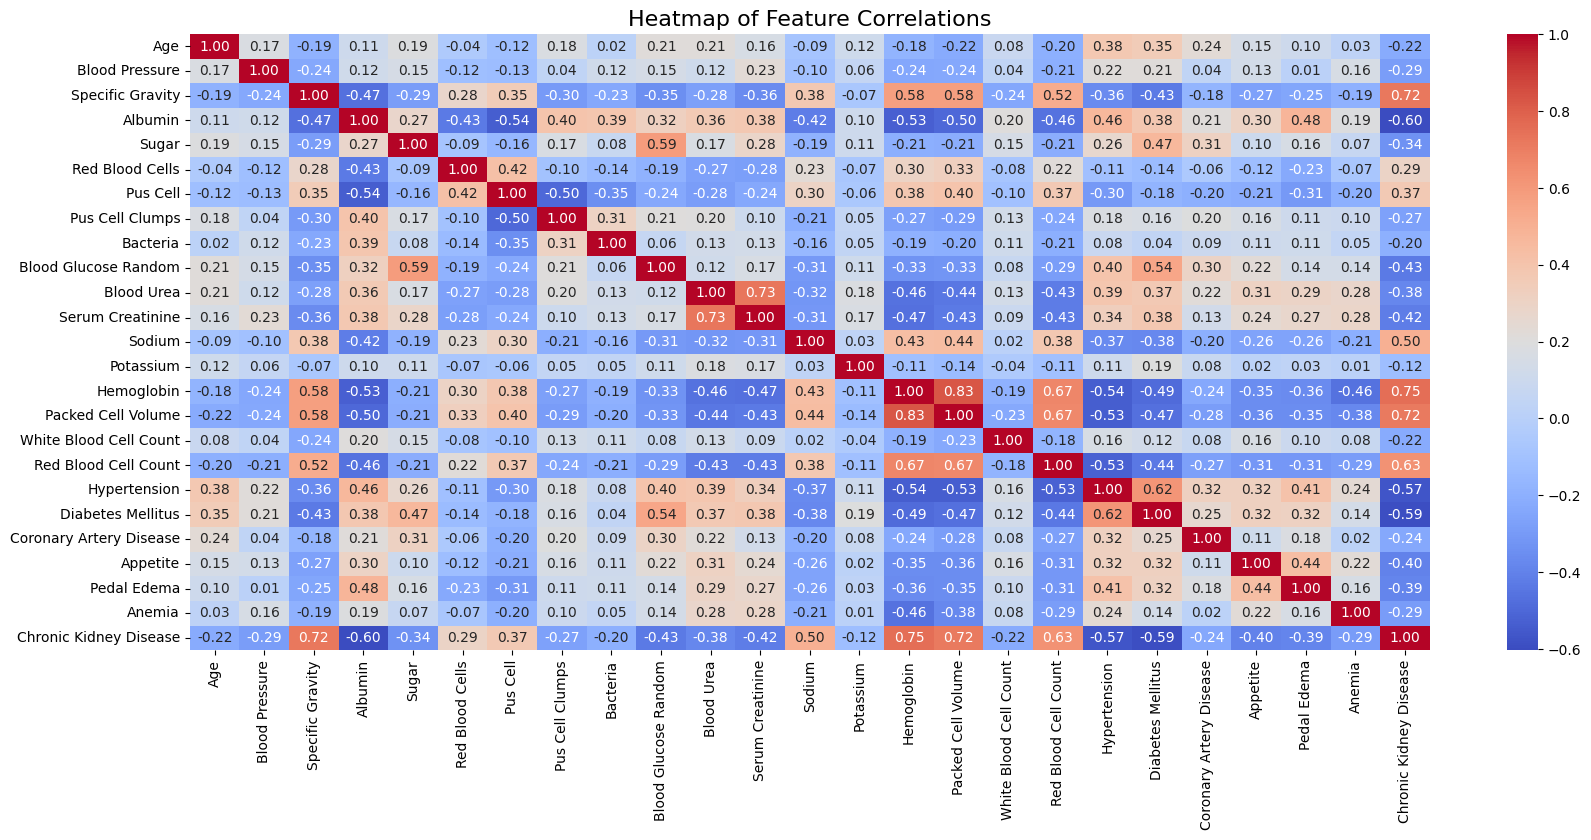

In [56]:
# Compute the correlation matrix
correlation_matrix = ckd_data.corr()

# Create a heatmap
plt.figure(figsize=(20, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Add a title to the heatmap
plt.title('Heatmap of Feature Correlations', fontsize=16)

# Display the heatmap
plt.show()

# Extracting Most Important Features

**Using Correleation Method**

In [57]:
# Calculate correlation of all features with the target variable
correlation_with_target = ckd_data.corr()['Chronic Kidney Disease'].abs()

# Drop the target variable itself from the correlation
correlation_with_target = correlation_with_target.drop('Chronic Kidney Disease')

# Select the 8 features with the highest correlation
top_8_features_corr = correlation_with_target.sort_values(ascending=False).head(8)
print("Top 8 features based on correlation:")
print(top_8_features_corr)

Top 8 features based on correlation:
Hemoglobin              0.754360
Specific Gravity        0.718409
Packed Cell Volume      0.716904
Red Blood Cell Count    0.629934
Albumin                 0.603372
Diabetes Mellitus       0.590922
Hypertension            0.570589
Sodium                  0.499364
Name: Chronic Kidney Disease, dtype: float64


**Using Random Forest Method**

In [58]:
# Separate features and target
X = ckd_data.drop(columns=['Chronic Kidney Disease'])  # Features
y = ckd_data['Chronic Kidney Disease']  # Target

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importance scores
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Select the top 8 features
top_8_features_rf = feature_importances.sort_values(ascending=False).head(8)
print("Top 8 features based on Random Forest importance:")
print(top_8_features_rf)

Top 8 features based on Random Forest importance:
Packed Cell Volume      0.169354
Specific Gravity        0.160425
Hemoglobin              0.129113
Red Blood Cell Count    0.116108
Serum Creatinine        0.106655
Albumin                 0.098751
Diabetes Mellitus       0.051395
Blood Glucose Random    0.046583
dtype: float64


# Extracting Dataset for Model Training

In [59]:
# List of selected feature names
selected_features = [
    'Hemoglobin',
    'Specific Gravity',
    'Packed Cell Volume',
    'Albumin',
    'Red Blood Cell Count',
    'Hypertension',
    'Diabetes Mellitus',
    'Sodium',
    'Serum Creatinine'
]

# Extract the features and target variable
X = ckd_data[selected_features]  # Feature set
y = ckd_data['Chronic Kidney Disease']  # Target variable

# Verify the extracted data
print("Shape of feature set (X):", X.shape)
print("Shape of target variable (y):", y.shape)


Shape of feature set (X): (330, 9)
Shape of target variable (y): (330,)


# Separating Dataset for Training and Testing

1.   List item
2.   List item



In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify the shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (264, 9)
Shape of X_test: (66, 9)
Shape of y_train: (264,)
Shape of y_test: (66,)


# Data Normalization

In [61]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Verify normalization
print("First 5 rows of normalized training data:\n", X_train_normalized[:5])
print("First 5 rows of normalized testing data:\n", X_test_normalized[:5])

First 5 rows of normalized training data:
 [[0.42727273 0.5        0.26666667 0.75       0.17142857 1.
  1.         0.43333333 0.17073171]
 [0.61818182 1.         0.7        0.         0.8        0.
  0.         1.         0.01829268]
 [0.53876698 0.5        0.52948328 0.5        0.48783856 0.
  0.         0.86666667 0.06707317]
 [0.33636364 0.5        0.33333333 0.75       0.48783856 1.
  1.         0.53333333 0.06707317]
 [0.78181818 0.5        0.7        0.         0.62857143 1.
  1.         0.56666667 0.01219512]]
First 5 rows of normalized testing data:
 [[0.26363636 0.25       0.2        1.         0.11428571 1.
  1.         0.56666667 0.23170732]
 [0.22727273 0.6203966  0.06666667 0.25423729 0.48783856 1.
  1.         0.53333333 0.09146341]
 [0.94545455 1.         0.96666667 0.         0.57142857 0.
  0.         1.         0.0304878 ]
 [0.42727273 0.75       0.5        1.         0.48783856 0.
  0.         0.5842918  0.01829268]
 [0.89090909 1.         0.66666667 0.         1.  

# Model Training

# Training Random Forest with Grid Search CV

*   List item
*   List item



In [62]:
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be a leaf node
    'max_features': ['sqrt', 'log2', None]    # Number of features to consider at each split
}

# Set up Grid Search CV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    verbose=2,
    n_jobs=-1  # Use all processors
)

# Fit Grid Search to the training data
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Train the final model with the best parameters
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.9923076923076923


In [63]:
# Predict on the test set
y_pred = best_rf.predict(X_test_normalized)

# Evaluating the Random Forest Model

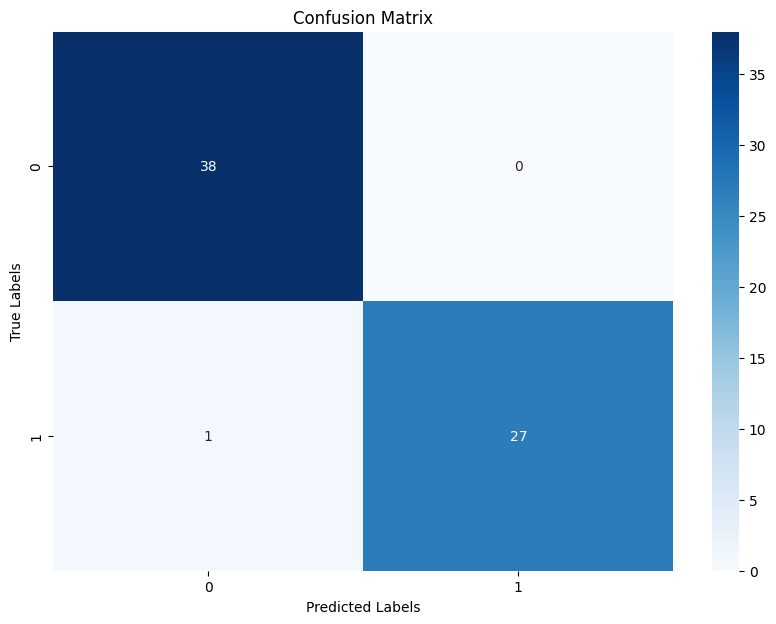


Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.96      0.98        28

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



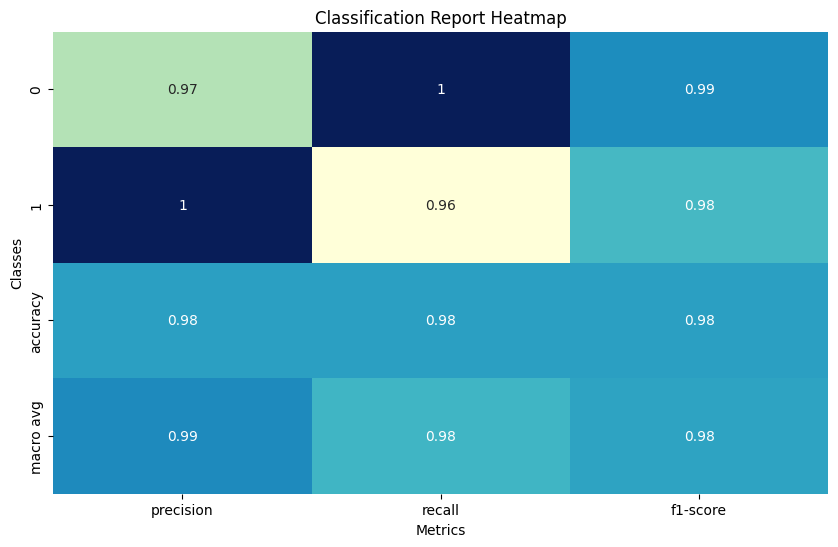

In [64]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a separate figure for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 2: Display the Classification Report in Text Form

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Step 3: Visualize the Classification Report as a Heatmap

# Convert the classification report into a dictionary and then into a DataFrame
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Create a separate figure for the classification report heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", cbar=False)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

# Applying KNN Model

In [65]:
# Define the KNN model
knn = KNeighborsClassifier()

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_normalized, y_train)

# Retrieve the best model and parameters
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [66]:
# Make predictions on the test set
y_pred_knn = best_knn.predict(X_test_normalized)

# Evaluating KNN Model


Test Set Accuracy: 0.9848484848484849

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.98        28

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.98        66
weighted avg       0.99      0.98      0.98        66



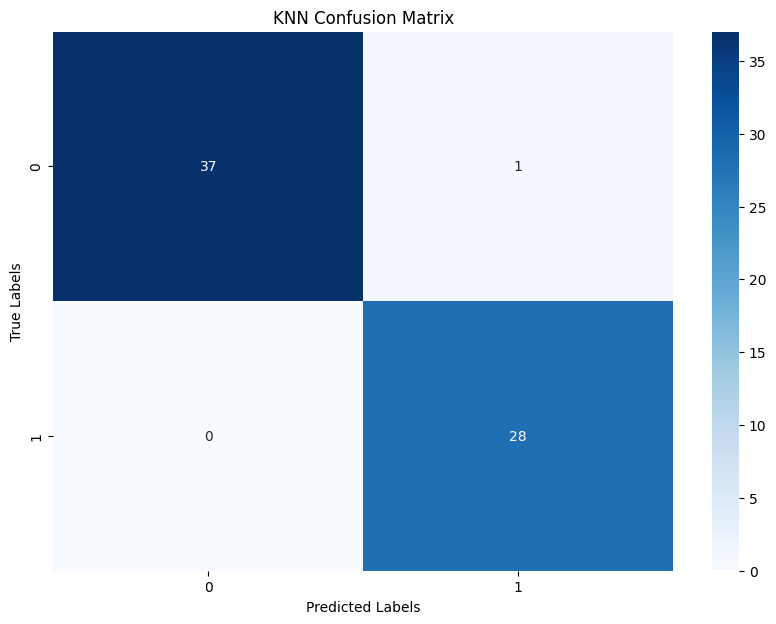

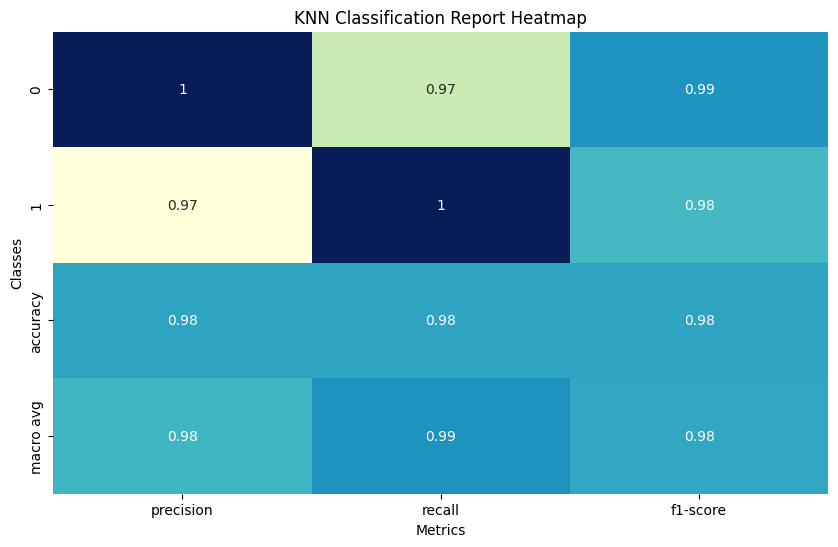

In [67]:
# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred_knn)
print("\nTest Set Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Visualize the confusion matrix and classification report
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report Heatmap
class_report_knn_dict = classification_report(y_test, y_pred_knn, output_dict=True)
class_report_knn_df = pd.DataFrame(class_report_knn_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(class_report_knn_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", cbar=False)
plt.title("KNN Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

# Applying ANN Model

In [68]:
# Define the ANN model (MLPClassifier)
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [69]:
# Perform GridSearchCV
grid_search_ann = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_ann.fit(X_train_normalized, y_train)

# Retrieve the best model and parameters
best_ann = grid_search_ann.best_estimator_
best_params_ann = grid_search_ann.best_params_
print("Best Parameters for ANN:", best_params_ann)

# Make predictions on the test set
y_pred_ann = best_ann.predict(X_test_normalized)


Best Parameters for ANN: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


# Evaluating ANN Model


Test Set Accuracy (ANN): 1.0

Classification Report (ANN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        28

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



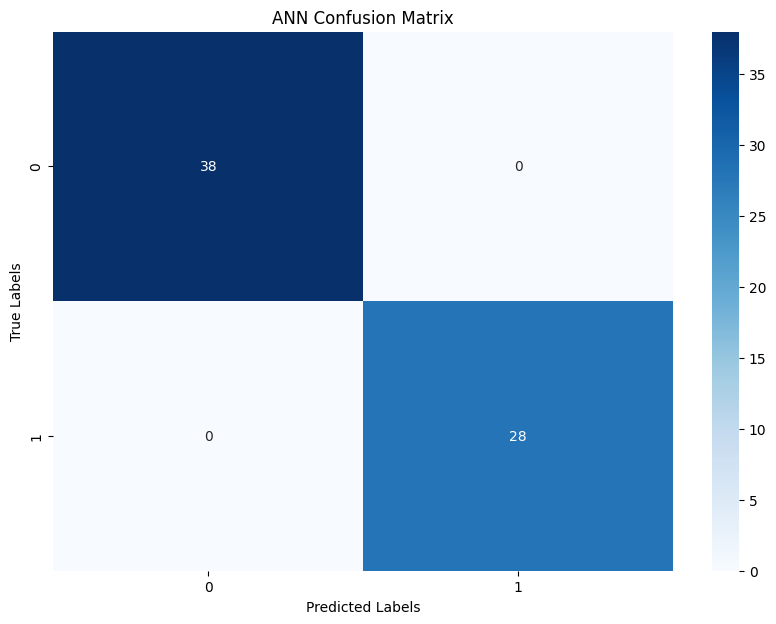

In [70]:
#  Evaluate the model
test_accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("\nTest Set Accuracy (ANN):", test_accuracy_ann)
print("\nClassification Report (ANN):\n", classification_report(y_test, y_pred_ann))

# Visualize the confusion matrix and classification report
# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

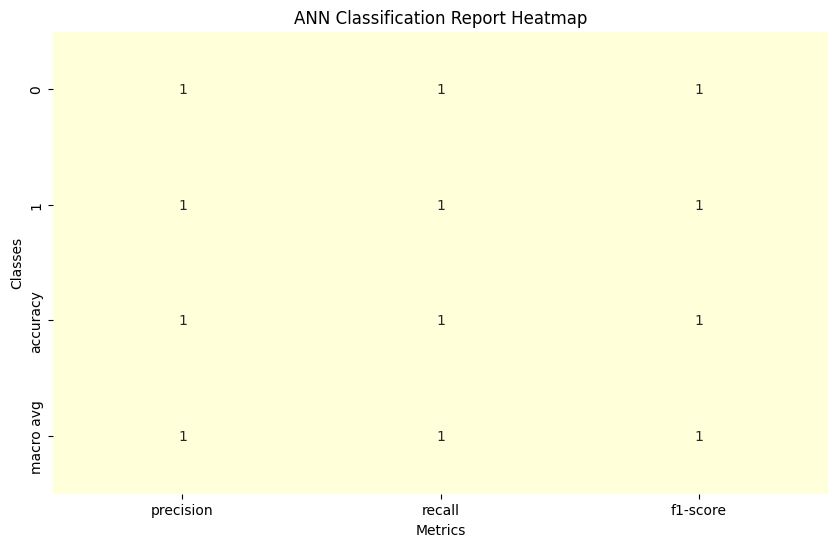

In [71]:
# Classification Report Heatmap
class_report_ann_dict = classification_report(y_test, y_pred_ann, output_dict=True)
class_report_ann_df = pd.DataFrame(class_report_ann_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(class_report_ann_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", cbar=False)
plt.title("ANN Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()